In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score,ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [2]:
social = pd.read_csv(r'C:/Users/Hitesh/Desktop/College/TE/DSBDA/Practicals/Assignment-4/Social_Network_Ads.csv')

In [3]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
corr_s = social.corr()

In [5]:
social.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
social_x = social.iloc[:,[1,2,3]]
social_y = social.iloc[:,[4]]

In [7]:
social_x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [8]:
encoder = LabelEncoder()

In [9]:
gender = np.array(social_x['Gender'])

In [10]:
social_x['Gender'] = encoder.fit_transform(gender)

<ipython-input-10-181916263dc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_x['Gender'] = encoder.fit_transform(gender)


In [11]:
social_x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [12]:
social_y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [13]:
x_train,x_test,y_train,y_test = train_test_split(social_x,social_y,test_size=0.25,random_state=4)

In [15]:
scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
logistic = LogisticRegression()

In [19]:
logistic.fit(x_train,y_train)

C:\Users\Hitesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [20]:
y_pred = logistic.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
y_train

,Purchased
60,0
152,0
12,0
212,0
321,1
...,...
360,1
385,1
197,0
174,0


In [24]:
accuracy = accuracy_score(y_test,y_pred)

In [25]:
accuracy

0.87

In [26]:
confusion = confusion_matrix(y_test,y_pred)

In [27]:
confusion

array([[65,  5],
       [ 8, 22]], dtype=int64)

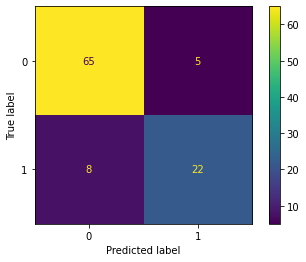

In [29]:
ConfusionMatrixDisplay(confusion).plot()

In [30]:
precision = precision_score(y_test,y_pred)

In [31]:
precision

0.8148148148148148

In [32]:
recall = recall_score(y_test,y_pred)

In [33]:
recall

0.7333333333333333

In [34]:
fp = confusion[0][1]
fn = confusion[1][0]
tp = confusion[1][1]
tn = confusion[0][0]

In [37]:
error_rate = (fp+fn)/(fp+fn+tp+tn)

In [38]:
error_rate

0.13

In [39]:
iris = sns.load_dataset('iris')

In [40]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
iris_x = iris.iloc[:,:3]
iris_y = iris.iloc[:,4]

In [46]:
iris_y = encoder.fit_transform(iris_y)

In [49]:
naive_bayes = GaussianNB()

In [51]:
x_train,x_test,y_train,y_test = train_test_split(iris_x,iris_y,test_size=0.25,random_state=4)

In [52]:
x_train = scaler.fit_transform(x_train)

In [53]:
x_test = scaler.transform(x_test)

In [54]:
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [55]:
iris_pred = naive_bayes.predict(x_test)

In [56]:
accuracy_iris = accuracy_score(y_test,iris_pred)

In [57]:
accuracy_iris

0.8947368421052632

In [58]:
confusion_iris = confusion_matrix(y_test,iris_pred)

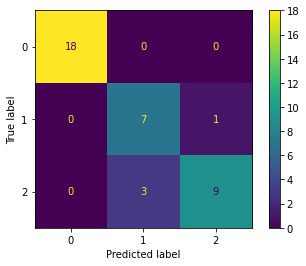

In [59]:
ConfusionMatrixDisplay(confusion_iris).plot()

In [60]:
iris_error_rate = 1-accuracy_iris

In [61]:
iris_error_rate

0.10526315789473684

In [65]:
precision_iris = precision_score(y_test,iris_pred,average='micro')

In [67]:
recall_iris = recall_score(y_test,iris_pred,average='micro')

0.8947368421052632